In [11]:
import pandas as pd
money = pd.read_excel("USD_CURRENCY.xlsx")
future = 7 # будем предсказывать курс на 7 дней вперед
past = 28 # используя данные о курсе за 28 дней назад
import sklearn
values = money.curs
start = past
end = len(values) - future

In [12]:
raw_data = []
for i in range(start, end):#берем только данные с которыми можно работать
    past_and_future_values = values[(i-past):(i+future)] #список из 35 элементов относительно текущей строки
    raw_data.append(list(past_and_future_values))

In [13]:
past_columns = []
for i in range(past):
    past_columns.append("past_{}".format(i))
 
future_columns = []
for i in range(future):
    future_columns.append("future_{}".format(i))

In [14]:
df = pd.DataFrame(raw_data, columns = (past_columns + future_columns))

Тренировочная выборка

In [15]:
x = df[past_columns][:-1] #вход модели, то что для предсказания
y = df[future_columns][:-1]# таргет, то что мы хотим предсказать

Тестовая выборка

In [16]:
x_test = df[past_columns][-1:]
y_test = df[future_columns][-1:]

In [17]:
from sklearn.neural_network import MLPRegressor
result = 2
number_of_iteration = 0
iter = 500
minresult = 1.39
 # для вывода наилучшего предсказания среди 1000 итераций(снять хэштег)
#while 1:  
while minresult > 0.7: 
    number_of_iteration = number_of_iteration + 1
    if number_of_iteration > 1000:
        minresult
        break
    iter = iter + 1;
    MLP = MLPRegressor(max_iter = iter, hidden_layer_sizes = (iter-499, iter-499 , iter-499), random_state = 42)
    MLP.fit(x,y)
    prediction = MLP.predict(x_test)[0]
    from sklearn.metrics import mean_absolute_error
    result = mean_absolute_error(y_test, [prediction])
    if result < minresult:
        minresult = result
minresult

/home/yamoldin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (501) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yamoldin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (502) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yamoldin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (506) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yamoldin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (507) reached and the optimization hasn't co

0.6890956412360926

In [18]:
from sklearn.cross_decomposition import PLSRegression
PLS = PLSRegression();
PLS.fit(x,y)
prediction = PLS.predict(x_test)[0]
from sklearn.metrics import mean_absolute_error
result = mean_absolute_error(y_test, [prediction])
i = 0
iter = 500
tol = 10
minresult = 1.39
while 1:
    if i > 10000:
        minresult
        break
    #for i in range(3):
    i = i + 1
    PLS = PLSRegression(max_iter = iter + i, n_components = 2, tol = 1e-06 + iter)
    PLS.fit(x,y)
    prediction = PLS.predict(x_test)[0]
    from sklearn.metrics import mean_absolute_error
    result = mean_absolute_error(y_test, [prediction])
    if result < minresult:
        minresult = result
minresult

1.0378240738202413

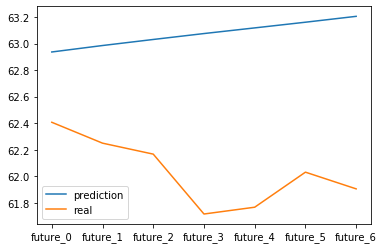

In [19]:
import matplotlib.pyplot as plt
plt.plot(prediction, label = "prediction")
plt.plot(y_test.iloc[0], label = "real")
plt.legend()

In [ ]:
 # простите меня, я просто не успеваю сделать нормальную модель в итоге обучил первую попавшуюся